In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kstest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
data = pd.read_csv(r'data.txt', sep='\s+',header=None)
names = data.columns
l = []
for i in range(len(data)):
    for j in range(len(names)):
        l.append(data[names[j]][i])
l = [x for x in l if np.isnan(x) == False]

## （1）平稳性和纯随机性检验

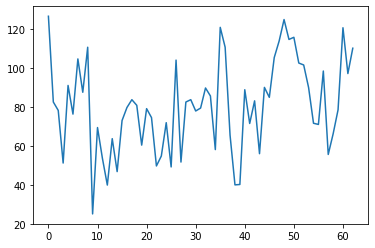

In [3]:
plt.plot(l)

In [4]:
from statsmodels.tsa.stattools import adfuller
adfuller(l,maxlag=12)

(-5.718539156024829,
 7.028398463320256e-07,
 0,
 62,
 {'1%': -3.540522678829176,
  '5%': -2.9094272025108254,
  '10%': -2.5923136524453696},
 446.62523395121235)

p值小于0.05,故拒绝不平稳原假设，即序列平稳。

In [5]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
lb_test(l,lags=12,boxpierce=False)

,lb_stat,lb_pvalue
1,6.190616,0.012843
2,12.063976,0.002401
3,12.159159,0.006857
4,13.273210,0.010015
5,13.278909,0.020901
6,13.283953,0.038742
7,13.647810,0.057812
8,13.971151,0.082520
9,14.158314,0.116804
10,14.175125,0.165152


前几阶就可以看出p值小于0.05，拒绝是纯白噪声的原假设，即不是纯随机序列。

## （2）建立适当模型

In [6]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

pm.auto_arima(l, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=580.733, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=576.012, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=578.531, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=738.576, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=574.592, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=575.724, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=575.287, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=576.067, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=577.716, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=586.400, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.392 seconds


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [7]:
model = ARIMA(l, order=(2,0,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -283.295
Date:                Fri, 27 May 2022   AIC                            574.590
Time:                        20:20:32   BIC                            583.163
Sample:                             0   HQIC                           577.962
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.5413      5.127     15.903      0.000      71.492      91.591
ar.L1          0.2541      0.130      1.957      0.050      -0.000       0.509
ar.L2          0.2374      0.147      1.612      0.107      -0.051       0.526
sigma2       469.6107     86.852      5.407      0.000     299.385     639.837
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.91   Prob(JB):                         0.66
Heteroskedasticity (H):               0.68   Skew:                            -0.27
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## （3）预测5年

In [8]:
result.predict(start=len(l), end =len(l) + 4 )

array([92.44336249, 91.06738618, 86.55017587, 85.07554463, 83.62850471])